In [22]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_df():
    df_paths = [name for name in glob.glob('Sources/*')]
    lst = []
    for df in df_paths:
        data = pd.read_csv(df)
        lst.append(data)
    return pd.concat(lst)

In [4]:
df = load_df()
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
df_size = df.size
print(df_size)

18137308


In [6]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [7]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [8]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [9]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 4534327 entries, 0 to 1028135
Columns: 4 entries, Date/Time to Base
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 173.0+ MB


In [10]:
df.shape

(4534327, 4)

In [11]:
uber_df = df

In [12]:
uber_df['BinnedHour'] = uber_df['Date/Time'].dt.floor('10min')

In [13]:
uber_df['BinnedHour']

0         2014-04-01 00:10:00
1         2014-04-01 00:10:00
2         2014-04-01 00:20:00
3         2014-04-01 00:20:00
4         2014-04-01 00:30:00
                  ...        
1028131   2014-09-30 22:50:00
1028132   2014-09-30 22:50:00
1028133   2014-09-30 22:50:00
1028134   2014-09-30 22:50:00
1028135   2014-09-30 22:50:00
Name: BinnedHour, Length: 4534327, dtype: datetime64[ns]

In [14]:
uber_df['day']=uber_df['Date/Time'].dt.day
uber_df['month']=uber_df['Date/Time'].dt.month
uber_df['hour']=uber_df['Date/Time'].dt.hour

In [15]:
uber_df.head(200) 

,Date/Time,Lat,Lon,Base,BinnedHour,day,month,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01 00:10:00,1,4,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01 00:10:00,1,4,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01 00:20:00,1,4,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01 00:20:00,1,4,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01 00:30:00,1,4,0
...,...,...,...,...,...,...,...,...
195,2014-04-01 08:39:00,40.7889,-73.9542,B02512,2014-04-01 08:30:00,1,4,8
196,2014-04-01 08:42:00,40.7835,-73.9513,B02512,2014-04-01 08:40:00,1,4,8
197,2014-04-01 08:43:00,40.7651,-73.9617,B02512,2014-04-01 08:40:00,1,4,8
198,2014-04-01 08:43:00,40.7261,-73.9918,B02512,2014-04-01 08:40:00,1,4,8


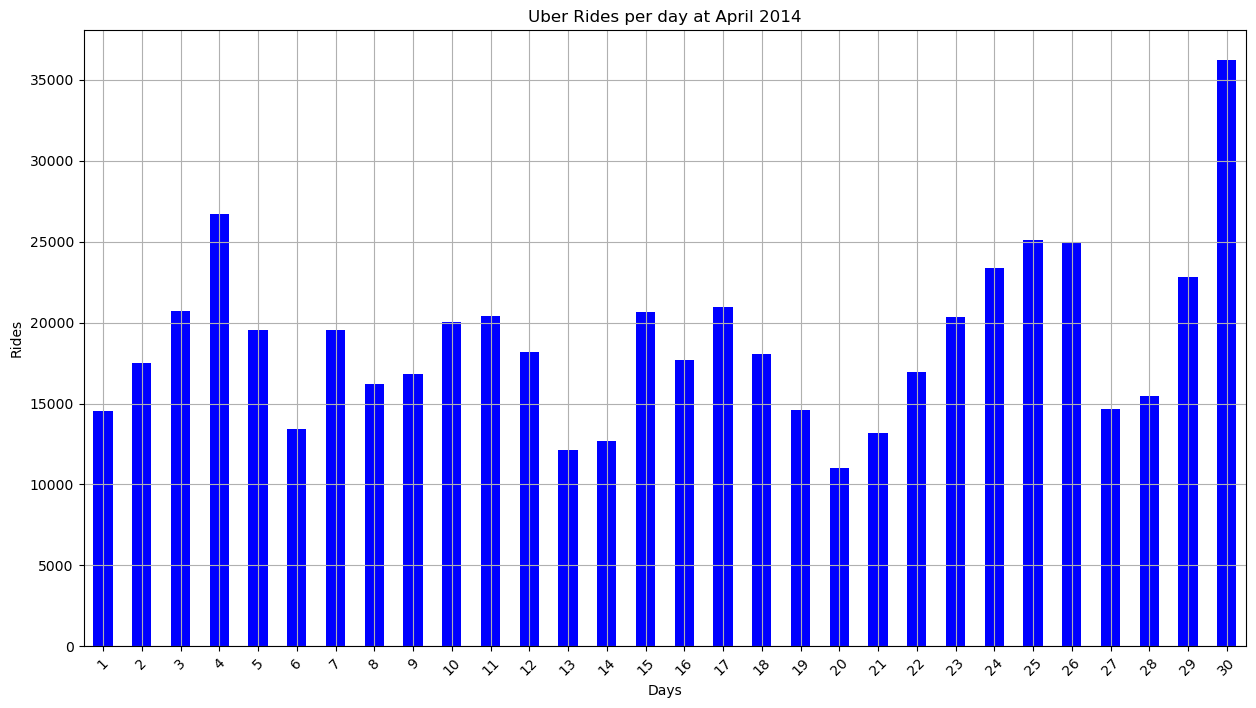

In [20]:
plt.figure(figsize=(15,8))
uber_df_abr = uber_df[uber_df['month']==4]
uber_df_abr['day'].value_counts().sort_index().plot(kind='bar',color='blue')

index = uber_df.loc[:,'day'].unique()

plt.title('Uber Rides per day at April 2014')
plt.xlabel('Days')
plt.ylabel('Rides')
plt.grid(True)
plt.show()

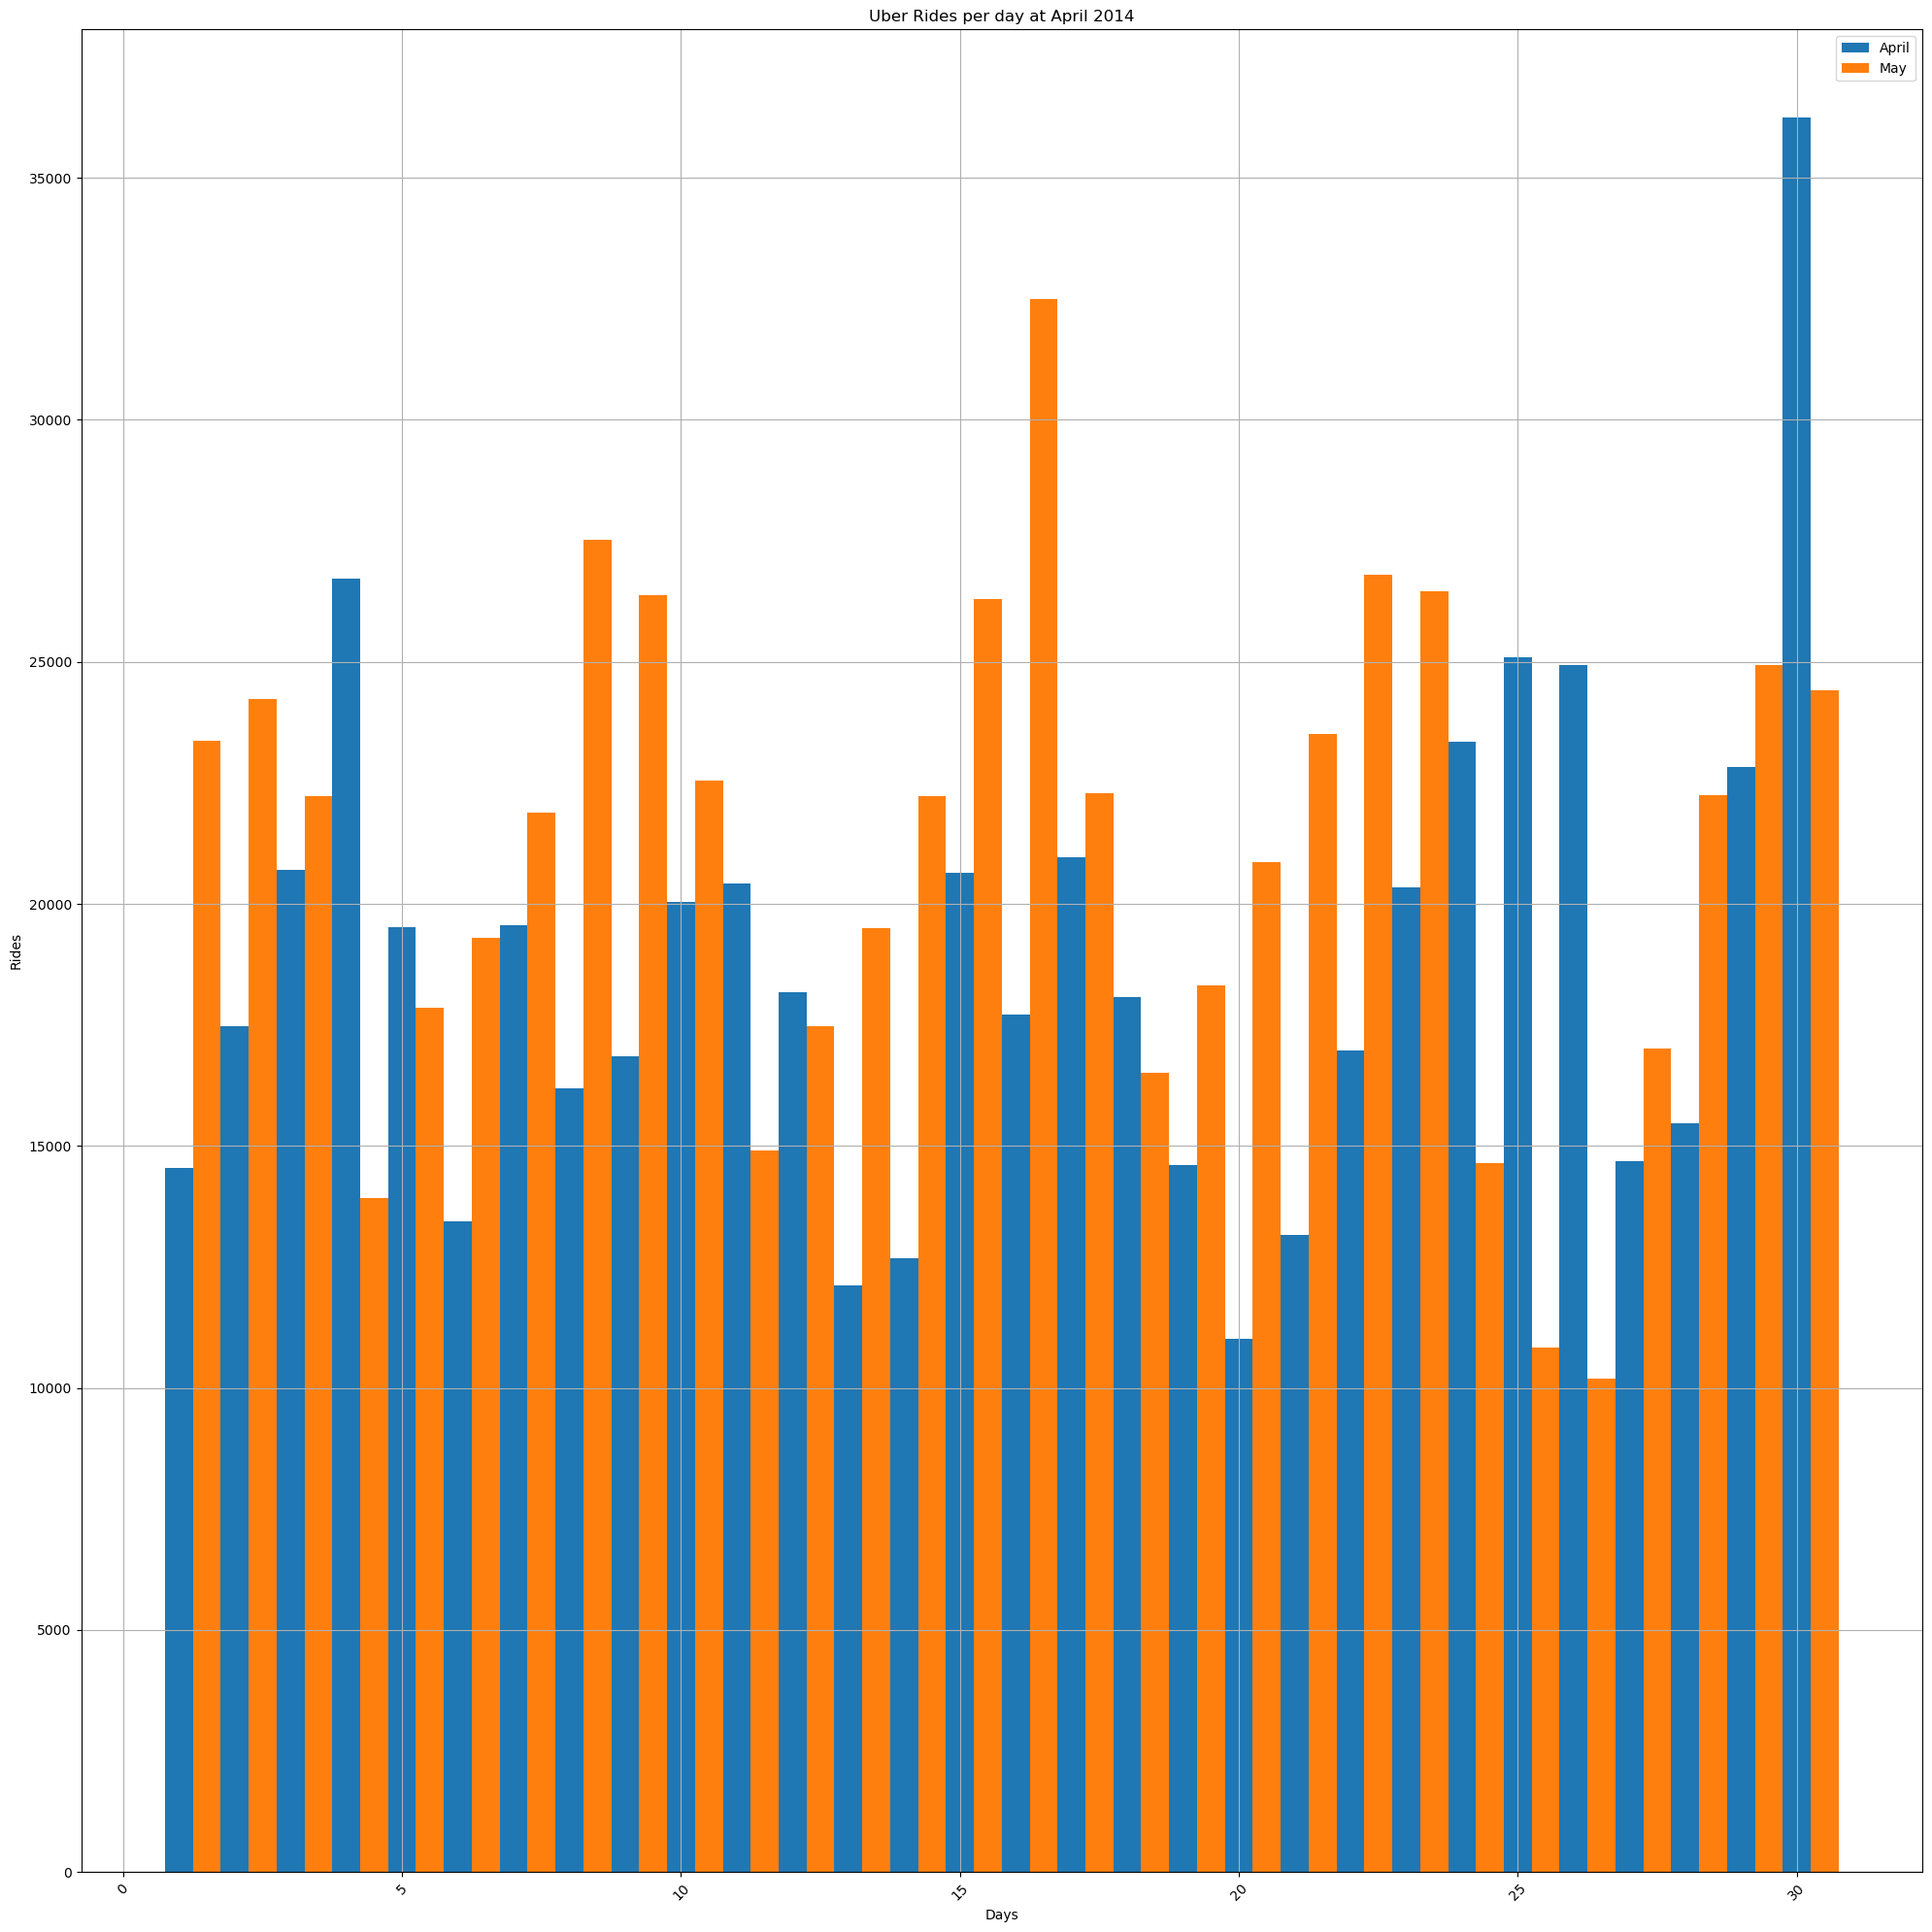

In [56]:
uber_df_abr = uber_df[uber_df['month']==4]
uber_df_may = uber_df[uber_df['month']==5]
uber_df_jun = uber_df[uber_df['month']==6]
uber_df_jul = uber_df[uber_df['month']==7]
uber_df_aug = uber_df[uber_df['month']==8]
uber_df_sep = uber_df[uber_df['month']==9]

bar_width = 0.5

# Find common dates between the two months
index = np.arange(1,31)

# Filter dataframes to include only common dates
uber_df_abr_filtered = uber_df_abr[uber_df_abr['day'].isin(index)]
uber_df_may_filtered = uber_df_may[uber_df_may['day'].isin(index)]

fig, ax = plt.subplots(layout='constrained')

abr = ax.bar(index, uber_df_abr_filtered["day"].value_counts().sort_index(), bar_width,
                label="April")

may = ax.bar(index+bar_width, uber_df_may_filtered["day"].value_counts().sort_index(),
                bar_width, label="May")

plt.title('Uber Rides per day at April 2014')
plt.xlabel('Days')
plt.ylabel('Rides')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.show()

In [60]:
np.random.randn(200, 3)

array([[ 7.26205313e-01, -9.87280047e-02, -6.58945809e-01],
       [ 4.71088156e-02, -5.20002018e-01, -2.73280514e-01],
       [-1.21826957e-01, -6.90126427e-03,  7.51661580e-01],
       [ 1.44345647e-03, -2.03086225e+00,  7.36933807e-02],
       [-1.23137983e+00, -1.65991652e+00, -9.65454464e-01],
       [ 1.35830555e-01, -1.00572658e+00,  7.08456789e-01],
       [ 7.13378572e-02,  9.41185177e-01,  1.80950221e+00],
       [ 6.04803367e-01,  1.19089891e+00,  5.96098562e-01],
       [ 7.47023460e-01, -2.11540863e+00,  1.94907341e+00],
       [-1.60153945e+00, -2.97335708e-01, -3.34691663e-01],
       [ 1.37085091e+00, -3.70696153e-01,  8.45816058e-01],
       [-4.83972156e-01, -1.47306967e+00,  7.27864991e-01],
       [-1.01588894e+00, -4.77742009e-01,  7.79695415e-01],
       [-8.40611640e-01, -4.47247076e-01,  1.35392533e+00],
       [ 1.72685734e+00, -1.31213393e+00,  2.46476437e+00],
       [ 8.92003083e-01,  2.21457109e+00,  6.10747962e-01],
       [-7.04541679e-01,  5.25015873e-01